Agents are connected but have their own states. Only the final responses are appended to global state

<img src="../../resources/images/multi_agent_supervisor.png" alt="Multi Agent Supervisor" height="300" width="300">

Agents are independent LangChain agents. This means they have their own individual prompt, LLM, and tools.

In [1]:
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=True)
# from src.langchain.lg_workflow import *
from src.langchain.agents.framenet_agent import *
from src.langchain.agents.flanagan_agent import *
from src.langchain.agents.pycram_agent import *
from src.langchain.agents.ad_agent import *
# from src.langchain.agents.pycram_corrector_agent import *
from src.langchain.agents.websearch_agent import *
from src.langchain.parallel_workflow import *
from src.resources.pycram.pycram_failures import *
from src.resources.pycram.pycram_action_designators import *
config = {"configurable" : {"thread_id" : 1}}

Sub Agent Creation
Sub Agent Creation
Sub Agent Creation
Sub Agent Creation
Sub Agent Creation


## Ad Agent

In [ ]:
input_question = "the person picks up a brown onion"
for s in ad_agent.stream(
    {"messages": [("user", input_question)]},
    subgraphs=True,
    config=config,
):
    print(s)
    print("----")

In [3]:
ad_agent.invoke({'messages': [("user", "pick up the blue cup and go to sink")]})

INSIDE ENTITY ATTRIBUTE FINDER
%%%%%%%%%%
%%%%%%%%%%


{'messages': [HumanMessage(content='pick up the blue cup and go to sink', additional_kwargs={}, response_metadata={}, id='8ed7cd89-4e77-4324-a1d2-ad8c18445d53'),
  AIMessage(content='', additional_kwargs={}, response_metadata={'model': 'qwen3:8b', 'created_at': '2025-06-03T09:43:47.551360768Z', 'done': True, 'done_reason': 'stop', 'total_duration': 1836153714, 'load_duration': 10807672, 'prompt_eval_count': 151, 'prompt_eval_duration': 12711216, 'eval_count': 136, 'eval_duration': 1804571814, 'model_name': 'qwen3:8b'}, id='run--18c685cc-4a55-426f-880b-048096df1eef-0', tool_calls=[{'name': 'entity_attribute_finder', 'args': {'instruction': 'pick up the blue cup and go to sink'}, 'id': '5420250b-bab7-4165-a8f7-e9933ca48052', 'type': 'tool_call'}], usage_metadata={'input_tokens': 151, 'output_tokens': 136, 'total_tokens': 287}),
  ToolMessage(content='"{\\n  \\"action\\": {\\n    \\"type\\": \\"PickingUp\\"\\n  },\\n  \\"object\\": {\\n    \\"type\\": \\"Cup\\",\\n    \\"name\\": \\"blue 

## Framenet Agent

In [4]:
fnr = framenet_tool.invoke({'instruction':'pour water from cup into sink'})
fnr

INSIDE FRAMENET TOOL


'{\n  "framenet": "pouring",\n  "frame": "Pouring",\n  "lexical-unit": "pour.v",\n  "core": {\n    "agent": "robot",\n    "theme_patient": "water",\n    "instrument": "spout",\n    "source": "cup",\n    "goal": "sink",\n    "result": "water in sink"\n  },\n  "peripheral": {\n    "location": "kitchen",\n    "manner": "steadily",\n    "direction": "downward",\n    "time": "during cleaning",\n    "quantity": "moderate amount",\n    "portion": "entire contents"\n  }\n}'

In [5]:
print(graph.get_state(config))

StateSnapshot(values={}, next=(), config={'configurable': {'thread_id': '1'}}, metadata=None, created_at=None, parent_config=None, tasks=(), interrupts=())


In [6]:
# Example: Complex Query Using Multiple Agents
input_question = "framenet representation of the action instruction pour water from the bottle into the container."
for s in graph.stream(
    {"messages": [("user", input_question)]},
    subgraphs=True,
    config=config,
):
    print(s)
    print("----")


Next Worker: framenet
((), {'supervisor': None})
----
Framenet Agent Response: content='' additional_kwargs={} response_metadata={'model': 'qwen3:8b', 'created_at': '2025-06-10T09:28:40.009781247Z', 'done': True, 'done_reason': 'stop', 'total_duration': 4753556660, 'load_duration': 16095282, 'prompt_eval_count': 185, 'prompt_eval_duration': 35377257, 'eval_count': 313, 'eval_duration': 4698172061, 'model_name': 'qwen3:8b'} id='run--8e6ffbf3-6f5c-4c3d-be35-9dd61d245a4d-0' tool_calls=[{'name': 'framenet_tool', 'args': {'instruction': 'pour water from the bottle into the container'}, 'id': 'ef842c34-9f99-493c-856b-277856009973', 'type': 'tool_call'}] usage_metadata={'input_tokens': 185, 'output_tokens': 313, 'total_tokens': 498}
INSIDE FRAMENET TOOL
(('framenet',), {'agent': {'messages': [AIMessage(content='', additional_kwargs={}, response_metadata={'model': 'qwen3:8b', 'created_at': '2025-06-10T09:28:40.009781247Z', 'done': True, 'done_reason': 'stop', 'total_duration': 4753556660, 'loa

In [ ]:
graph.get_state(config)

In [ ]:
graph.invoke({'messages': [HumanMessage(content='framenet representation of the action pick up the cup from the fridge')]}, config=config)['messages'][0].content

In [ ]:
graph.get_state(config=config)

In [ ]:
# graph.get_state(config=config).values['messages'][-1].content
framenet_answers

In [ ]:
graph.invoke({'messages': [HumanMessage(content='framenet representation of the action pick up the mug from the fridge')]})['messages'][1].content

## Flanagan Agent

In [ ]:
# Example: Complex Query Using Multiple Agents
input_question = "flanagan representation of the action instruction pour water from the bottle into the container."
for s in graph.stream(
    {"messages": [("user", input_question)]},
    subgraphs=True,
    config=config,
):
    print(s)
    print("----")


In [ ]:
graph.invoke({'messages': [HumanMessage(content='flanagan representation of instruction pickup the bottle from the fridge')]}, config=config)['messages'][1].content

In [4]:
flanagan_agent.invoke({'messages': [HumanMessage(content='flanagan representation of instruction pour water from the bottle into the container')]})

INSIDE flanagan TOOL


{'messages': [HumanMessage(content='flanagan representation of instruction pour water from the bottle into the container', additional_kwargs={}, response_metadata={}, id='8ed634cb-07fa-4266-8843-a89969bfff88'),
  AIMessage(content='', additional_kwargs={}, response_metadata={'model': 'qwen3:8b', 'created_at': '2025-05-22T10:31:58.581448324Z', 'done': True, 'done_reason': 'stop', 'total_duration': 2586442344, 'load_duration': 16211292, 'prompt_eval_count': 183, 'prompt_eval_duration': 45782615, 'eval_count': 183, 'eval_duration': 2521237008, 'model_name': 'qwen3:8b'}, id='run--9eee54de-2923-457e-a717-a88282c1a40b-0', tool_calls=[{'name': 'flanagan_tool', 'args': {'__arg1': 'pour water from the bottle into the container'}, 'id': '80bfb0e7-3bd1-4990-a9f3-381402a97211', 'type': 'tool_call'}], usage_metadata={'input_tokens': 183, 'output_tokens': 183, 'total_tokens': 366}),
  ToolMessage(content='"{\\n  \\"task\\": \\"pour water from the bottle into the container\\",\\n  \\"pre_motion_phase

In [ ]:
from IPython.display import display, Image
# display(Image(math_agent.get_graph().draw_mermaid_png()))
# display(Image(websearch_agent.get_graph().draw_mermaid_png()))
# display(Image(framenet_agent.get_graph().draw_mermaid_png()))
# display(Image(graph.get_graph().draw_mermaid_png()))

## Pycram Agent

In [2]:
# Example: Complex Query Using Multiple Agents
input_question = "pick up the cup and go to sink"
for s in pycram_agent.stream(
    {"messages": [("user", input_question)]},
    subgraphs=True,
    config=config,
):
    print(s)
    print("----")


NameError: name 'pycram_agent' is not defined

In [3]:
pycram_agent.invoke({"messages" : [HumanMessage(content="pick up the cup from the sink nad place it on the table")]})
# pycram_agent.invoke({"messages": "pick up the cup from the sink"})

INSIDE MODEL SELECTOR TOOL
response of tool 1 :  <class 'src.langchain.agents.pycram_agent.ActionNames'> model_names=['PickUpAction', 'NavigateAction', 'PlaceAction']
INSIDE MODEL POPULATOR TOOL


{'messages': [HumanMessage(content='pick up the cup from the sink nad place it on the table', additional_kwargs={}, response_metadata={}, id='d2d893bf-1067-4b4a-a45c-ea3a0057d81c'),
  AIMessage(content='', additional_kwargs={}, response_metadata={'model': 'qwen3:8b', 'created_at': '2025-05-21T14:37:07.905881324Z', 'done': True, 'done_reason': 'stop', 'total_duration': 3858742822, 'load_duration': 15010790, 'prompt_eval_count': 766, 'prompt_eval_duration': 19129209, 'eval_count': 269, 'eval_duration': 3819956112, 'model_name': 'qwen3:8b'}, id='run--b6fb78e7-7957-4984-beb0-114f625fff31-0', tool_calls=[{'name': 'model_selector', 'args': {'instruction': 'pick up the cup from the sink nad place it on the table'}, 'id': '6a8ef7af-4656-4c59-bec1-fc69f9d2df0b', 'type': 'tool_call'}], usage_metadata={'input_tokens': 766, 'output_tokens': 269, 'total_tokens': 1035}),
  ToolMessage(content='{"model_names": ["PickUpAction", "NavigateAction", "PlaceAction"]}', name='model_selector', id='a8d35b2a-ab

In [ ]:
instruction_for_populator = {
        "instruction": "pick up the cup from the sink",
        "model_names": ["PickUpAction"]
    }

In [ ]:
res = model_selector.invoke("pick up the cup from the sink")
res

In [ ]:
res = model_populator.invoke({"instruction":"pick up the cup from the sink", "model_names": ["PickUpAction"]})
res

In [ ]:
print(res['populated_models'])

## Other Agents

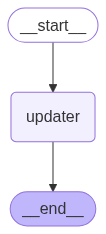

In [7]:
from IPython.display import display, Image
display(Image(sole.get_graph().draw_mermaid_png()))

In [8]:
test_obj = ObjectModel(name="cup",concept="cup", color="blue")
test_robot = ObjectModel(name="robot", concept="robot")
test_links = [Link(name="gripper_link"), Link(name="wrist_link")]
test_pose = PoseStamped(pose=Pose(
    position=Vector3(x=1.0, y=2.0, z=3.0),
    orientation=Quaternion(x=0.0, y=0.0, z=0.0, w=1.0)))

action_designator = """PickUpAction(object_designator=test_obj, arm=Arms.LEFT,
                                 grasp_description=GraspDescription(approach_direction=Grasp.TOP,vertical_alignment=Grasp.TOP, rotate_gripper=True))"""
grasping_error = "ObjectNotGraspedErrorModel(obj=test_obj, robot=test_robot, arm=Arms.LEFT, grasp=Grasp.TOP)"

In [ ]:
sole.invoke({"action_designator": action_designator, "reason_for_failure": grasping_error, "human_comment" : "pick the blue bottle not the cup"})

In [ ]:
# update_agent.invoke({"action_designator": action_designator, "reason_for_failure": grasping_error, "human_comment" : "pick the blue bottle not the cup"})

In [ ]:
# for s in designator_updater.stream({"action_designator" : action_designator, "reason_for_failure" : grasping_error,
#                                "human_comment" : "i want to pick up the pink bottle not the blue cup"}):
#     print(s)

In [ ]:
# Example: Complex Query Using Multiple Agents
input_question = "what is 2 times 2"
for s in graph.stream(
    {"messages": [("user", input_question)]},
    subgraphs=True, config=config
):
    print(s)
    print("----")


In [3]:
graph.get_state(config=config)

StateSnapshot(values={'messages': [HumanMessage(content='what is 2 times 2', additional_kwargs={}, response_metadata={}, id='5ed96ad9-c015-471b-8da5-1aa825ecbccb'), HumanMessage(content='4.0', additional_kwargs={}, response_metadata={}, name='mather', id='cbff03d1-31ae-4f4a-9d1e-1a48b54a970c')]}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f037ba7-512a-6d84-8003-71d1861535de'}}, metadata={'source': 'loop', 'writes': {'supervisor': None}, 'step': 3, 'parents': {}, 'thread_id': 1}, created_at='2025-05-23T09:44:01.608818+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f037ba7-4bd5-6b5b-8002-60e5ae69ac77'}}, tasks=(), interrupts=())

In [ ]:
# Example: Complex Query Using Multiple Agents
input_question = "what is the value of 2 + 10"
for s in graph.stream(
    {"messages": [("user", input_question)]},
    subgraphs=True
):
    print(s)
    print("----")


In [ ]:
# # Example: Complex Query Using Multiple Agents
# input_question = "who is apple company founder"
# for s in graph.stream(
#     {"messages": [("user", input_question)]},
#     subgraphs=True
# ):
#     print(s)
#     print("----")


In [ ]:
# # Example: Complex Query Using Multiple Agents
# input_question = "who is the ceo of google and what is the framenet representation of apple"
# for s in graph.stream(
#     {"messages": [("user", input_question)]},
#     subgraphs=True
# ):
#     print(s)
#     print("----")


In [ ]:
# # Example: Complex Query Using Multiple Agents
# input_question = "who is the ceo of google, what is the framenet representation of apple and how much is 2 times 10"
# for s in graph.stream(
#     {"messages": [("user", input_question)]},
#     subgraphs=True
# ):
#     print(s)
#     print("----")


## Practice

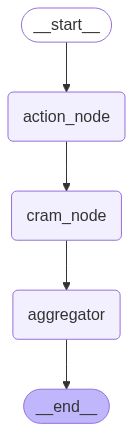

In [2]:
from IPython.display import display, Image
display(Image(pal_graph.get_graph().draw_mermaid_png()))

In [3]:
for chunk in pal_graph.stream({"instruction" : 'pour the water from the mug into sink'}, subgraphs=True, config=config):
    print(chunk)
    print("----")

INSIDE ACTION NODE
type={'action': 'Pouring'}
['Pouring']
((), {'action_node': {'action_type': '{\n  "type": {\n    "action": "Pouring"\n  }\n}', 'action_core': 'Pouring'}})
----
INSIDE UNIVERSAL NODE
cram_plan (perform (an action (type pour-from-container) (source (an object (type container.n.01) (contains (a substance (type {stuff}){stuff_props}))))(count (unit {unit}){unit_props}(number {amount}){amount_props}))(a location (in {goal}){goal_props}))
----------
{
  "stuff": "water",
  "goal": "sink",
  "action_verb": "pour",
  "unit": null,
  "amount": null
}
----------
{
  "action_roles": {
    "stuff": "water",
    "goal": "sink",
    "action_verb": "pour",
    "unit": null,
    "amount": null,
    "stuff_props": {
      "color": "clear",
      "transparency": "transparent"
    }
  }
}
----------
(perform (an action (type pour-from-container) (source (an object (type container.n.01) (contains (a substance (type water) (color clear) (transparency transparent)) )))(a location (in sink

In [4]:
final_state = pal_graph.invoke({"instruction" : 'pour the water from the mug into sink'})

INSIDE ACTION NODE
type={'action': 'Pouring'}
['Pouring']
INSIDE UNIVERSAL NODE
cram_plan (perform (an action (type pour-from-container) (source (an object (type container.n.01) (contains (a substance (type {stuff}){stuff_props}))))(count (unit {unit}){unit_props}(number {amount}){amount_props}))(a location (in {goal}){goal_props}))
----------
{
  "stuff": "water",
  "goal": "sink",
  "action_verb": "pour",
  "unit": null,
  "amount": null
}
----------
{
  "action_verb": "pour",
  "unit": null,
  "amount": null,
  "stuff": "water",
  "stuff_props": {
    "transparency": "transparent",
    "color": "clear",
    "texture": "smooth"
  },
  "goal": "sink"
}
----------
(perform (an action (type pour-from-container) (source (an object (type container.n.01) (contains (a substance (type water) (transparency transparent) (color clear) (texture smooth))))) (a location (in sink) (goal_props))))
----------


In [11]:
dix = dict(final_state)
dix["cram_plan_response"]

'(perform (an action (type pour-from-container) (source (an object (type container.n.01) (contains (a substance (type water) (transparency transparent) (color clear) (texture smooth))))) (a location (in sink) (goal_props))))'

In [5]:
framenet_answers

['{\n  "framenet": "chasing",\n  "frame": "Chasing",\n  "lexical-unit": "chase.v",\n  "core": {\n    "agent": "cat",\n    "theme_patient": "mouse",\n    "instrument": "",\n    "source": "",\n    "goal": "",\n    "result": "mouse is fleeing"\n  },\n  "peripheral": {\n    "location": "living room",\n    "manner": "quickly",\n    "direction": "forward",\n    "time": "after hearing a noise",\n    "quantity": "one mouse",\n    "portion": ""\n  }\n}']

In [5]:
pal_graph.invoke({"messages" : HumanMessage(content='pick up the orange cup from the table')}, config=config)

INSIDE ENTITY ATTRIBUTE FINDER
%%%%%%%%%%
%%%%%%%%%%
Framenet Agent Response: content='' additional_kwargs={} response_metadata={'model': 'qwen3:8b', 'created_at': '2025-06-03T09:44:51.357978599Z', 'done': True, 'done_reason': 'stop', 'total_duration': 924008090, 'load_duration': 8187002, 'prompt_eval_count': 443, 'prompt_eval_duration': 49457653, 'eval_count': 33, 'eval_duration': 859857844, 'model_name': 'qwen3:8b'} id='run--8f028674-7d73-4bc9-a6c5-134d7eff265a-0' tool_calls=[{'name': 'framenet_tool', 'args': {'instruction': 'pick up the orange cup from the table'}, 'id': '84ca977a-cc53-4f24-8a28-2ebc2665f775', 'type': 'tool_call'}] usage_metadata={'input_tokens': 443, 'output_tokens': 33, 'total_tokens': 476}
INSIDE FRAMENET TOOL
INSIDE MODEL SELECTOR TOOL
The instruction is : pick up the orange cup from the table
response of tool 1 :  <class 'src.langchain.agents.pycram_agent.ActionNames'> model_names=['PickUpAction']
Framenet Agent Response: content="<think>\n</think>\n\nThe syste

{'messages': [HumanMessage(content='pick up the orange cup from the table', additional_kwargs={}, response_metadata={}, id='c32f674e-cc72-4c6a-9c27-b9e733720caf'),
  HumanMessage(content='<think>\nOkay, the user asked to "pick up the orange cup from the table." I used the entity_attribute_finder function to parse this instruction. The response from the tool breaks down the action into components. The action type is "PickingUp," which makes sense. The object is the "orange cup," and the location is the "table." \n\nLooking at the properties, the cup\'s color is specified as orange, and its position is "on" the table. The table\'s properties don\'t have specific details, which might be okay since the focus is on the cup. The tool\'s response seems to correctly identify the entities and their attributes. \n\nI should check if all necessary information is captured. The user\'s instruction is straightforward, so the tool\'s output aligns with the request. No additional parameters are needed

In [ ]:
pal_graph.get_state(config=config,subgraphs=True)

In [ ]:
entity_attribute_finder.invoke("pick up the mango from the table")

In [ ]:
ad_agent_node_pal({"messages" : [HumanMessage(content='pick up the orange cup from the table')]})

In [9]:
gs = [g for g in pal_graph.get_subgraphs()]

In [20]:
history = [his for his in pal_graph.get_state_history(config=config)]

In [25]:
history[3]

StateSnapshot(values={'messages': [HumanMessage(content='pick up the orange cup from the table', additional_kwargs={}, response_metadata={}, id='59efda3b-c9a4-4715-8d2b-d747f0ef95c5')]}, next=('action_designator',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f03b037-da95-6be1-8000-037e01e621ae'}}, metadata={'source': 'loop', 'writes': None, 'step': 0, 'parents': {}, 'thread_id': 1}, created_at='2025-05-27T14:04:22.767709+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f03b037-da94-638f-bfff-c3d5ee72a29c'}}, tasks=(PregelTask(id='090865c3-ae9f-ec18-e377-598f0474cfba', name='action_designator', path=('__pregel_pull', 'action_designator'), error=None, interrupts=(), state={'configurable': {'thread_id': '1', 'checkpoint_ns': 'action_designator:090865c3-ae9f-ec18-e377-598f0474cfba'}}, result={'messages': [HumanMessage(content='{\n  "action": {\n    "type": "PickingUp"\n  },\n  "object": {\n    "type": 

In [9]:
entity_attribute_finder.invoke("the person picks up a brown onion")

INSIDE ENTITY ATTRIBUTE FINDER
%%%%%%%%%%
%%%%%%%%%%


'{\n  "action": {\n    "type": "PickingUp"\n  },\n  "object": {\n    "type": "PhysicalArtifact",\n    "name": "Onion",\n    "properties": {\n      "size": null,\n      "length": null,\n      "width": null,\n      "height": null,\n      "volume": null,\n      "shape": null,\n      "symmetry": null,\n      "color": null,\n      "texture": null,\n      "pattern": null,\n      "reflectance": null,\n      "transparency": null,\n      "material": "organic",\n      "weight": null,\n      "density": null,\n      "firmness": null,\n      "grip": null,\n      "balance": null,\n      "handle": null,\n      "blade": null,\n      "edge": null,\n      "point": null,\n      "corners": null,\n      "skin": null,\n      "cleanliness": null,\n      "condition": "whole",\n      "intactness": "intact",\n      "freshness": "fresh",\n      "ripeness": "ripe",\n      "dirt": "some",\n      "count": null,\n      "orientation": null,\n      "position": null,\n      "odor": null,\n      "type": null,\n      "fi